In [1]:
!pip install librosa

# Module Load

In [ ]:
import librosa
import librosa.display
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import librosa.display
import os
import pandas as pd

# 그래프 그려보기

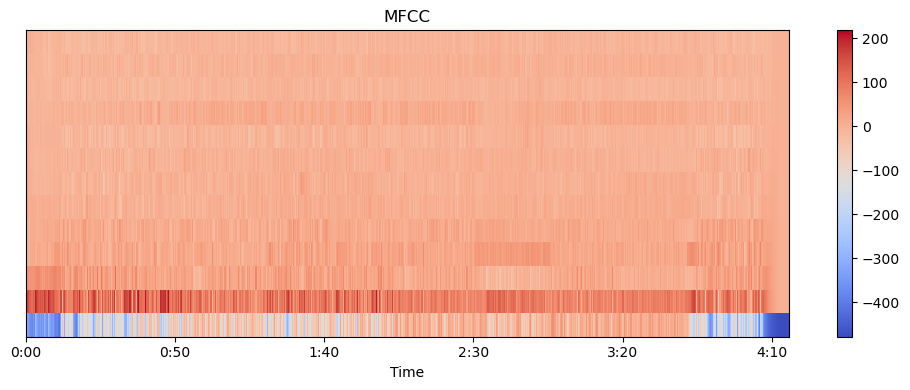

In [ ]:
# 오디오 파일 불러오기
audio_file = "C:/Users/aischool291/__FP/Playlist/0.드라이빙, 분위기 있는 밤/[MV] 10CM _ Go Back(고백).mp3"
y, sr = librosa.load(audio_file)

# MFCC 계산
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# MFCC 시각화

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


Estimated Tempo: 161.4990234375 BPM


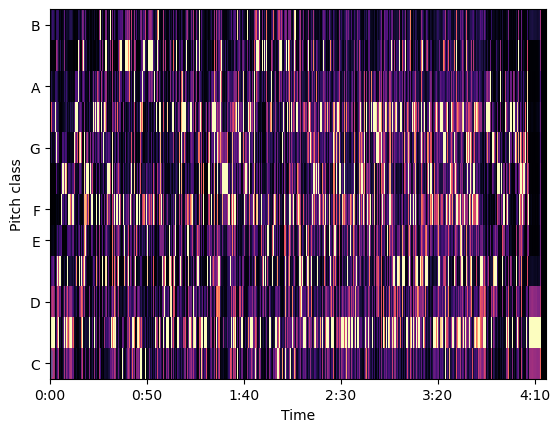

In [ ]:
# 음원 로드
y, sr = librosa.load("C:/Users/aischool291/__FP/Playlist/0.드라이빙, 분위기 있는 밤/[MV] 10CM _ Go Back(고백).mp3")

# 멜로디 분석 (피치 추출)
pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
melody = np.max(pitches, axis=0)
melody = melody[np.nonzero(melody)]

# 리듬 분석 (온셋 탐지 및 템포 추정)
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
tempo, beat_frames = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# 화성 분석 (Chromagram)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# 동적 범위 분석 (RMS)
rms = librosa.feature.rms(y=y)

# 결과 출력 (예시)
print(f"Estimated Tempo: {tempo} BPM")
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
librosa.display.waveshow(rms[0], sr=sr, alpha=0.4)

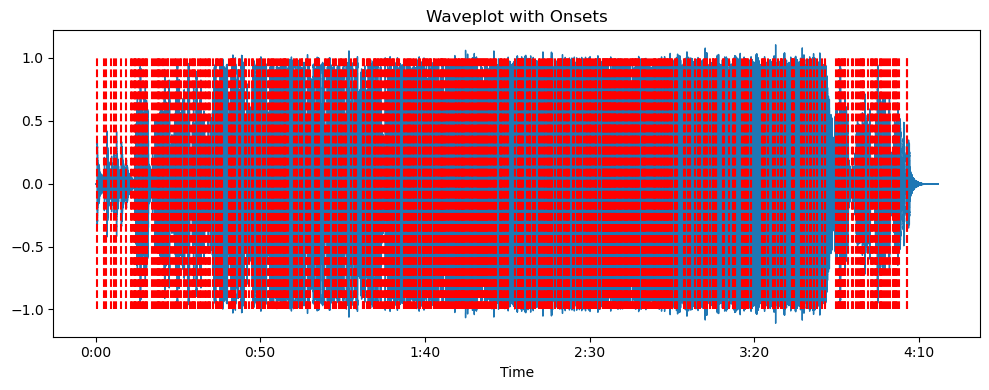

In [ ]:
y, sr = librosa.load("C:/Users/aischool291/__FP/Playlist/0.드라이빙, 분위기 있는 밤/[MV] 10CM _ Go Back(고백).mp3")

# 리듬 (온셋 탐지)
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.vlines(onset_times, -1, 1, color='r', linestyle='--')
plt.title('Waveplot with Onsets')
plt.tight_layout()
plt.show()


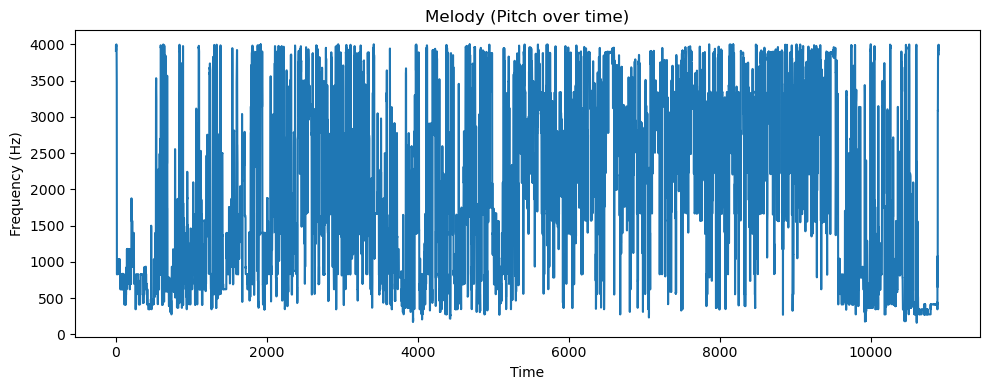

In [ ]:
# 멜로디 (피치 추출)
pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
melody = np.max(pitches, axis=0)
melody = melody[np.nonzero(melody)]
plt.figure(figsize=(10, 4))
plt.plot(melody)
plt.title('Melody (Pitch over time)')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

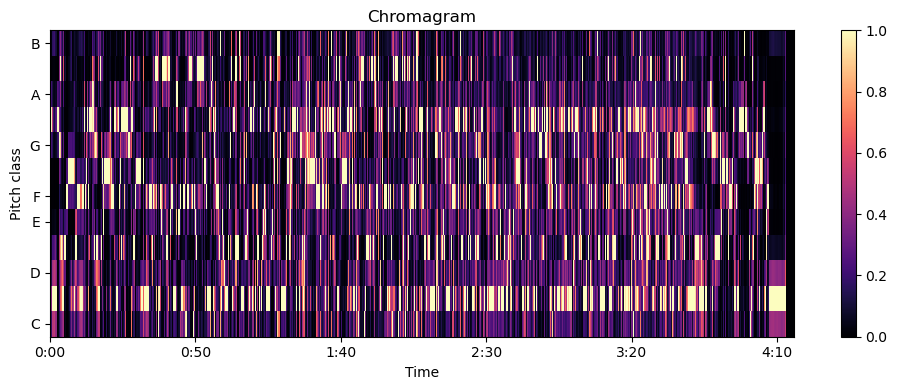

In [ ]:
# 화성 (Chromagram)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

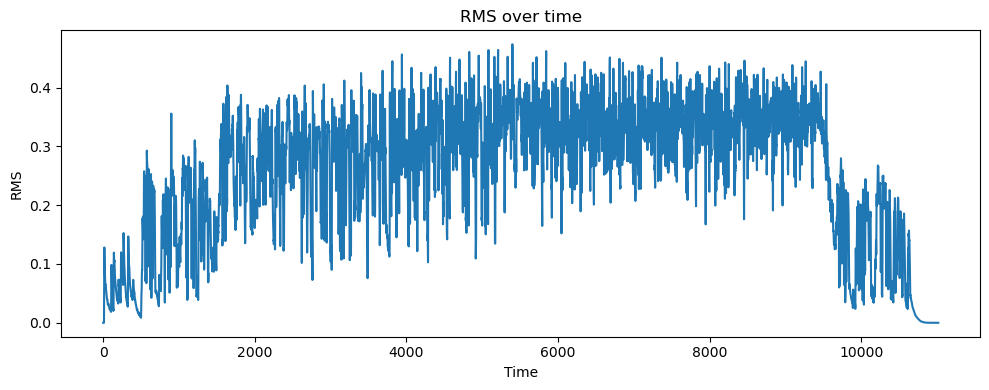

In [ ]:
# 동적 범위 (RMS)
rms = librosa.feature.rms(y=y)
plt.figure(figsize=(10, 4))
plt.plot(rms[0])
plt.title('RMS over time')
plt.xlabel('Time')
plt.ylabel('RMS')
plt.tight_layout()
plt.show()

# 수치화한 코드

In [ ]:
# 오디오 파일 로드
file_path = 'C:/Users/aischool291/__FP/Playlist/0.드라이빙, 분위기 있는 밤/[MV] 10CM _ Go Back(고백).mp3'
y, sr = librosa.load(file_path)

# MFCCs 추출
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# Tempo and Beat 추출
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

# Zero Crossing Rate 추출
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

# Chroma Feature 추출
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)

# Spectral Contrast 추출
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

# Loudness를 추출하는 표준 방법이 librosa에는 없으나,
# 소리의 라우드니스를 측정하기 위해 RMS 값을 사용할 수 있음
rms = librosa.feature.rms(y=y)

# 추출한 특징을 출력
print("MFCCs:", np.mean(mfccs))
print("Tempo:", np.mean(tempo))
print("Beats:", np.mean(beats))
print("Zero Crossing Rate:", np.mean(zero_crossing_rate))
print("Chroma Feature:", np.mean(chroma_stft))
print("Spectral Contrast:", np.mean(spectral_contrast))
print("Loudness (RMS):", np.mean(rms))


MFCCs: 1.1320184
Tempo: 161.4990234375
Beats: 5298.205705705705
Zero Crossing Rate: 0.08230453149110466
Chroma Feature: 0.2806128
Spectral Contrast: 24.57666333713563
Loudness (RMS): 0.25677532


# 데이터프레임화 하는 코드

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

def extract_features(file_path):
    # 파일 로드 및 오디오 신호 y와 샘플링 레이트 sr 획득
    y, sr = librosa.load(file_path)

    # MFCC 계산 및 평균값 추출
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    mfccs_mean = np.mean(mfccs, axis=1)

    # 템포와 비트 정보 추출
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
    beat_count = len(beats)

    # 제로 크로싱 비율 계산 및 평균값 추출
    zcr = librosa.feature.zero_crossing_rate(y)
    zcr_mean = np.mean(zcr)

    # 크로마 피처 계산 및 평균값 추출
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)

    # 스펙트럼 대비 계산 및 평균값 추출
    spec_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    spec_contrast_mean = np.mean(spec_contrast, axis=1)

    # RMS(루트 평균 제곱) 계산 및 평균값 추출
    rms = librosa.feature.rms(y=y)
    rms_mean = np.mean(rms)

    # 추출된 특징들을 딕셔너리로 반환
    features = {
        'mfccs_mean': mfccs_mean,
        'tempo': tempo,
        'beats': beat_count,
        'zcr_mean': zcr_mean,
        'chroma_mean': chroma_mean,
        'spectral_contrast_mean': spec_contrast_mean,
        'loudness': rms_mean
    }

    return features

def extract_features_from_directory(directory):
    features_list = []

    # 파일 리스트 생성
    files = [file for file in os.listdir(directory) if file.lower().endswith('.mp3') and '_full' not in file.lower()]

    def process_file(file):
        file_path = os.path.join(directory, file)
        features = extract_features(file_path)
        features['file'] = file
        return features

    # ThreadPoolExecutor를 이용한 병렬 처리
    with ThreadPoolExecutor(max_workers=8) as executor:
        results = list(tqdm(executor.map(process_file, files), total=len(files), desc="Extracting Features"))

    # 결과를 DataFrame으로 변환
    df = pd.DataFrame(results)

    for col in ['mfccs_mean', 'chroma_mean', 'spectral_contrast_mean']:
        df[col] = df[col].apply(np.mean)

    df[['artist', 'song']] = (
        df['file'].str.replace('trimmed_', '')
        .str.replace('.mp3', '', regex=False)
        .str.split('뿔충이두마리', 1, expand=True)
    )
    df['song'] = df['song'].str.rstrip('.mp3')
    df.drop('file', axis=1, inplace=True)

    cols = ['artist', 'song'] + [col for col in df.columns if col not in ['artist', 'song']]
    df = df[cols]

    return df
# 사용 예제
directory = 'D:/data/mp3/2180_1'
df = extract_features_from_directory(directory)


Extracting Features:  38%|███████████████████▏                               | 12734/33824 [1:39:08<2:24:07,  2.44it/s]C:\Users\aischool291\anaconda3\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
Extracting Features: 100%|█████████████████████████████████████████████████████| 33824/33824 [4:23:14<00:00,  2.14it/s]
C:\Users\aischool291\AppData\Local\Temp\ipykernel_19624\3825683536.py:72: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['file'].str.replace('trimmed_', '')


In [ ]:
df

,artist,song,mfccs_mean,tempo,beats,zcr_mean,chroma_mean,spectral_contrast_mean,loudness
0,Borodin Petite Suite - Reverie (보로딘 작은 모음곡 -...,잔잔한 피아노,-9.636919,57.421875,85,0.032444,0.257279,25.466057,0.057293
1,동행 (Going Together) (기타 & 피아노 연주곡),Unknown,-11.254756,117.453835,172,0.039044,0.264257,26.713644,0.050167
2,Chopin Waltz (쇼팽 왈츠),잠들기전,-11.765048,117.453835,171,0.064952,0.219028,27.044616,0.038778
3,꿈에,자장가,-8.848394,135.999178,205,0.035474,0.202100,26.970010,0.105946
4,구름위에 앉아,잠잘오는음악,-6.981611,117.453835,177,0.044145,0.244020,26.760475,0.065399
...,...,...,...,...,...,...,...,...,...
33819,한 여름의 크리스마스 (With You),Red Velvet (레드벨벳),3.542838,103.359375,152,0.123629,0.365207,22.429229,0.231117
33820,Haru (with meenoi),Bronze (브론즈),4.111686,92.285156,135,0.081595,0.338892,22.826973,0.323042
33821,Summer Go Loco (Feat. GRAY),로꼬,1.689672,99.384014,141,0.106241,0.434807,22.246763,0.283469
33822,summer,keshi,-0.341580,172.265625,254,0.073844,0.411229,23.631467,0.209575


In [ ]:
df.to_csv('D:/data/mp3/result.csv')